In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


In [51]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor


In [5]:
data = pd.read_csv("D:/Machine Learning/dummyData/Advertising.csv")

In [6]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 5)

In [8]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
data.rename(columns={'Unnamed: 0':'sr.no'},inplace=True)

In [13]:
data.head()

,sr.no,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Univariate

In [14]:
data.describe()

,sr.no,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='newspaper', ylabel='sales'>

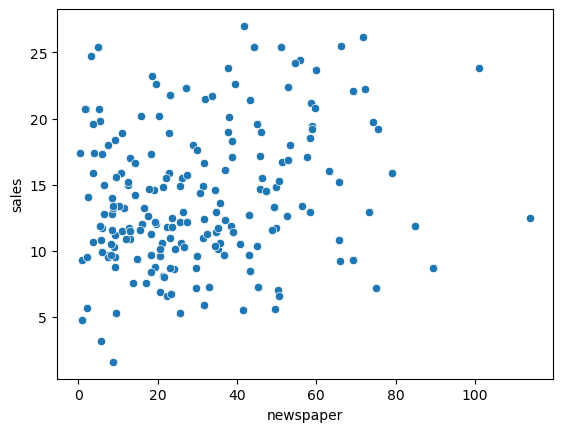

In [16]:
sb.scatterplot(data = data, x='newspaper', y = 'sales')

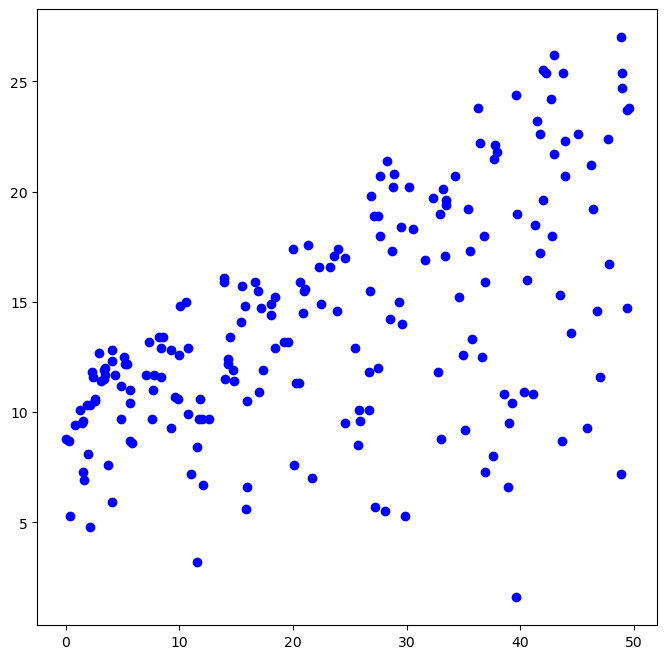

In [21]:
plt.figure(figsize=(8,8))

plt.scatter(data['radio'], data['sales'],c="b")

plt.show()

<Axes: xlabel='radio', ylabel='sales'>

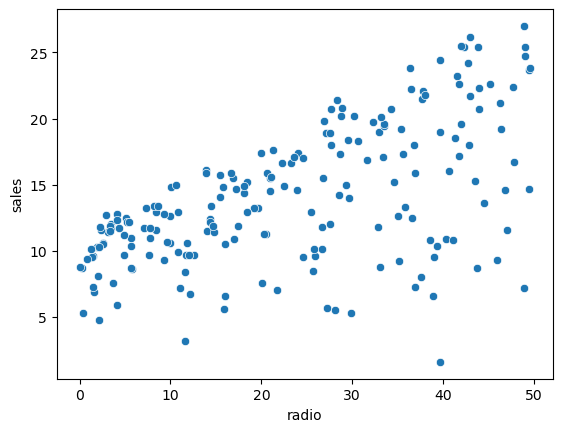

In [18]:
sb.scatterplot(data = data, x='radio', y = 'sales')

<Axes: xlabel='TV', ylabel='sales'>

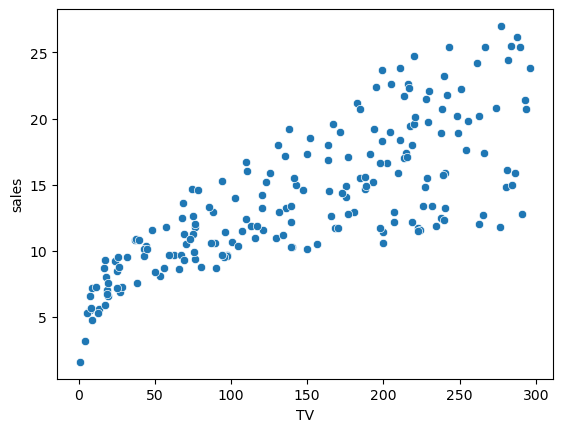

In [22]:
sb.scatterplot(data = data, x='TV', y = 'sales')

In [29]:
data_corelation = data.corr()

In [30]:
data_corelation

,sr.no,TV,radio,newspaper,sales
sr.no,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


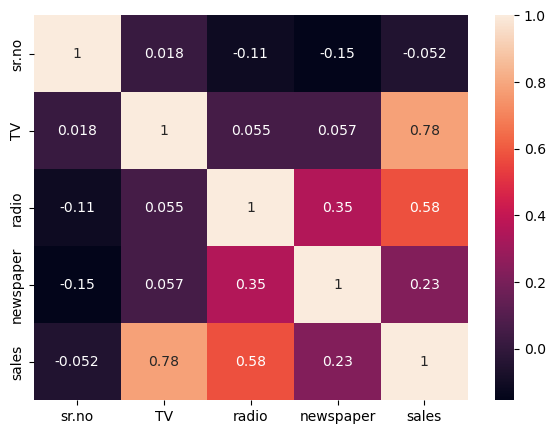

In [35]:
plt.subplots(figsize=(7, 5))
sb.heatmap(data_corelation, annot=True)
plt.show()

## linear regression function

In [36]:
def Linear_Regression(x_train, y_train):
    print("Linear Regression: ")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

## Lasso regression function

In [38]:
def Lasso_Regression(x_train, y_train):
    print("Lasso Regression: ")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

## Ridge Regression Function
Creating a function for Ridge Regression Model fit on the data


In [39]:

def Ridge_Regression(x_train, y_train):
    print("Ridge Regression: ")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression


## Sochastic Gradient Descent Regression
Creating a function for Sochastic Gradient Descent Regression Model fit on the data

In [40]:


def SGD_Regressor(x_train, y_train):
    print("SGD Regression: ")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression


## Multilayer Preceptron Regresson
Creating a function for MLP Regressor Neural Network to fit the data. 3 Hidden layers, with 13 neurons each.


In [41]:

def MLP_Regressor(x_train, y_train):
    print("MLP Regressor: ")
    mlp_regressor = MLPRegressor(activation='relu', hidden_layer_sizes=(13,13,13), solver='lbfgs', verbose = True, max_iter= 20000)
    mlp_regressor.fit(x_train, y_train)
    return mlp_regressor

## Build and Train Model Function
Creating a Function for building, training and evaluating the model by using the train test split method where X is all variables but the median value and Y is target name = sales. The function preprocesses the data using standard scaler, trains the model ans print out the r2 score for accuracy, with the predicted values vs actual values.


In [42]:

def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)

    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training score: ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("medv of home")
    plt.legend()
    plt.show()

    return{'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10)
            }

## Linear Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.


Linear Regression: 
Training score:  0.8901610355665466
Testing Score :  0.9202971079876334
     y_test     y_pred
164    11.9  11.038814
183    26.2  23.885778
147    25.4  23.066324
144    11.4  10.109951
145    10.3   9.698417
155     3.2   5.403339
14     19.0  18.420903
66      9.5   9.131756
102    14.8  17.519478
191     9.9   8.421194


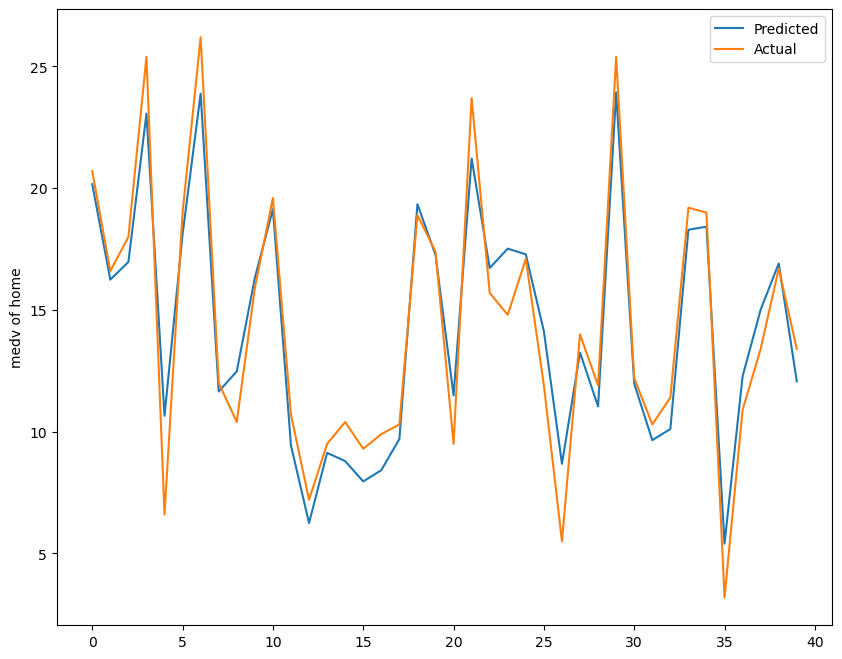

In [45]:

Linear_regression = build_and_train_model(data, "sales", Linear_Regression)

## Lasso Regression Model fit results
Utilizing the build and train model function to predict and score the Lasso Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.


Lasso Regression: 
Training score:  0.8468325843006127
Testing Score :  0.8813312403672804
     y_test     y_pred
47     23.2  19.937104
107     8.7   8.763636
43     12.9  14.199388
197    12.8  13.210232
187    17.3  16.378226
120    15.5  14.267543
186    10.3  10.834664
177    11.7  12.752970
32      9.6   9.180015
51     10.7  10.402817


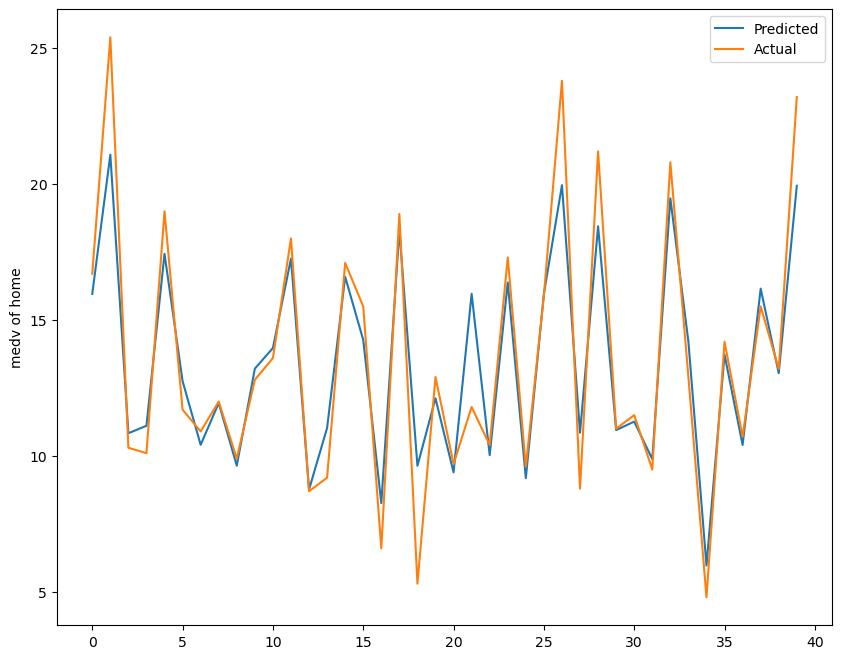

In [47]:
Lasso_regression = build_and_train_model(data, "sales", Lasso_Regression)

## Ridge Regression Model fit results
Utilizing the build and train model function to predict and score the Ridge Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.


Ridge Regression: 
Training score:  0.8964051018006548
Testing Score :  0.8985287119813574
     y_test     y_pred
172     7.6   7.613993
135    11.6  13.981834
49      9.7   8.091162
109    19.8  19.631920
176    20.2  19.990704
54     20.2  20.281306
159    12.9  12.409961
106     7.2   6.088109
129     9.7   7.878974
57     13.2  12.683545


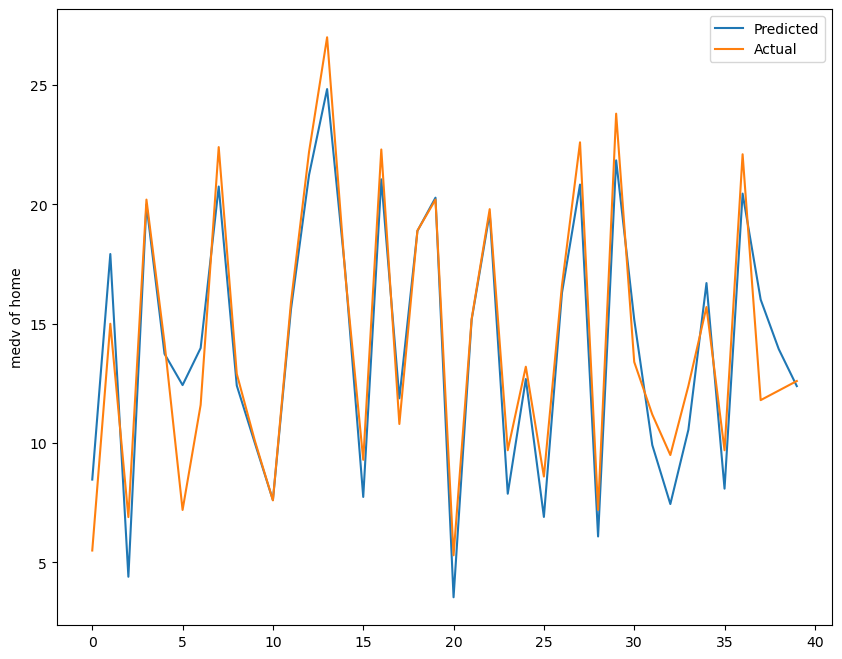

In [48]:

Ridge_regression = build_and_train_model(data, "sales", Ridge_Regression)

## Sochastic Gradient Descent Regression Model fit results
Utilizing the build and train model function to predict and score the Sochastic Gradient Descent Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.


SGD Regression: 
Training score:  0.9003771449326546
Testing Score :  0.8664609761800159
     y_test     y_pred
183    26.2  24.149921
104    20.7  20.307983
188    15.9  18.784996
159    12.9  12.396353
69     22.3  21.063139
30     21.4  21.761928
51     10.7   9.369309
67     13.4  12.074310
182     8.7   6.544284
102    14.8  17.831377


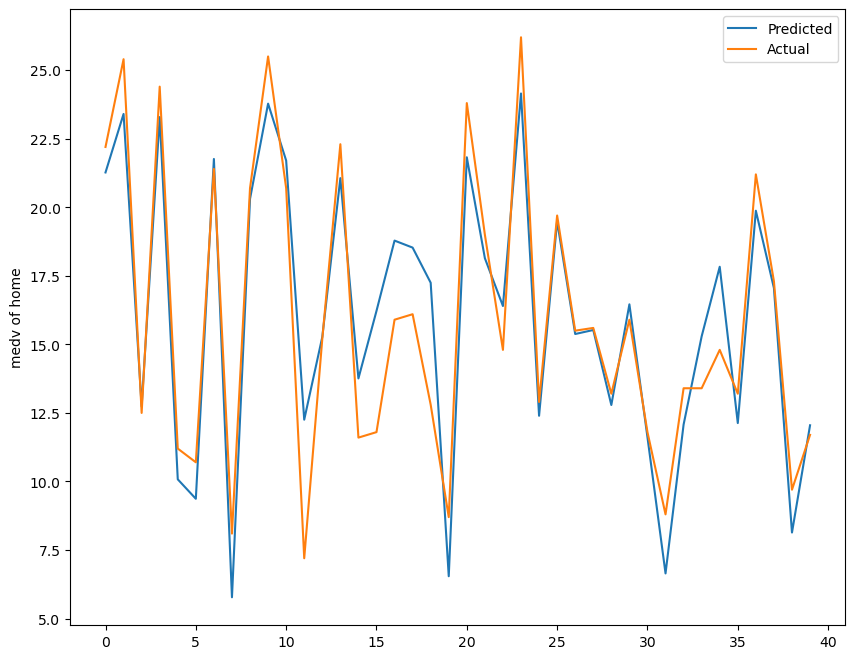

In [52]:

SGD_regression = build_and_train_model(data, "sales", SGD_Regressor)

## Multilayer Preceptron Regression Neural Network model fit results
Utilizing the build and train model function to predict and score the Multilayer Preceptron Regression Neural Network algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.


MLP Regressor: 
Training score:  0.9991450946493273
Testing Score :  0.9781554999011592
     y_test     y_pred
81     12.3  12.478674
135    11.6  13.528670
181    12.2  12.298951
104    20.7  21.224707
38     10.1  10.767865
75      8.7   9.582228
141    19.2  19.544024
59     18.4  18.165410
155     3.2   5.228057
188    15.9  15.975291


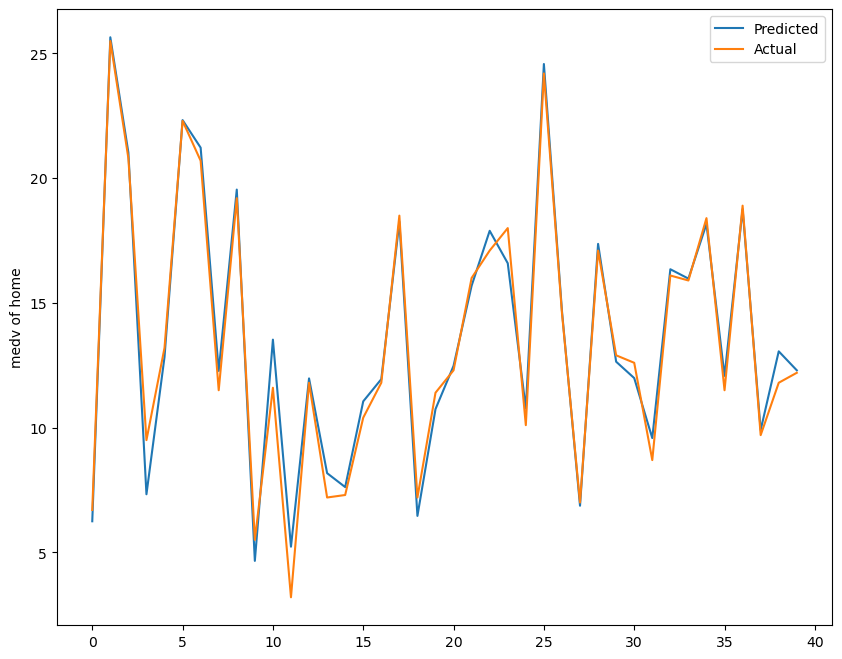

In [53]:

MLP_Regression = build_and_train_model(data, "sales", MLP_Regressor)
